In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("frabbisw/facial-age")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/facial-age


In [ ]:
import os
import shutil

source_dir = '/kaggle/input/facial-age/face_age'
target_dir = '/kaggle/working/face_age_cleaned'

os.makedirs(target_dir, exist_ok=True)

for item in os.listdir(source_dir):
    src_path = os.path.join(source_dir, item)
    dst_path = os.path.join(target_dir, item)

    # Omitimos la carpeta duplicada
    if item == 'face_age':
        continue

    if os.path.isdir(src_path):
        shutil.copytree(src_path, dst_path)
    else:
        shutil.copy2(src_path, dst_path)

print("Contenido copiado a /kaggle/working/face_age_cleaned sin la carpeta problemática.")

Contenido copiado a /kaggle/working/face_age_cleaned sin la carpeta problemática.


In [ ]:
# normalizar_imagenes.py
import os
import shutil

source_dir = '/kaggle/working/face_age_cleaned'
target_dir = '/kaggle/working/face_age_cleaned_binary'

# Crear carpetas destino
os.makedirs(os.path.join(target_dir, '0'), exist_ok=True)  # Menores de edad
os.makedirs(os.path.join(target_dir, '1'), exist_ok=True)  # Mayores de edad

for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)

    if not os.path.isdir(folder_path):
        continue

    try:
        edad = int(folder_name)  # Ej: '024' → 24
    except ValueError:
        continue

    clase = '0' if edad < 18 else '1'
    destino_clase = os.path.join(target_dir, clase)

    for filename in os.listdir(folder_path):
        src_path = os.path.join(folder_path, filename)

        if os.path.isfile(src_path):
            dst_path = os.path.join(destino_clase, f"{folder_name}_{filename}")
            shutil.copy2(src_path, dst_path)

print("✔️ Imágenes clasificadas por edad en face_age_cleaned_binary/")

✔️ Imágenes clasificadas por edad en face_age_cleaned_binary/


In [ ]:
# entrenar_modelo.py
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Configuración
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = "/kaggle/working/face_age_cleaned_binary"

# Generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binario
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento
model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

# Guardar modelo
model.save("modelo.keras")
print("✅ Modelo guardado como modelo.keras")

Found 7823 images belonging to 2 classes.
Found 1955 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


245/245 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step - accuracy: 0.6791 - loss: 0.6027 - val_accuracy: 0.8419 - val_loss: 0.3647
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8726 - loss: 0.3055 - val_accuracy: 0.9069 - val_loss: 0.2536
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8862 - loss: 0.2722 - val_accuracy: 0.9274 - val_loss: 0.2146
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9129 - loss: 0.2295 - val_accuracy: 0.8829 - val_loss: 0.2953
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9109 - loss: 0.2194 - val_accuracy: 0.8655 - val_loss: 0.3505
Epoch 6/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9318 - loss: 0.1843 - val_accuracy: 0.8072 - val_loss: 0.4367
Epoch 7/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9359 - loss: 0.1683 - val_accuracy: 0.8409 - val_loss: 0.4299
Epoch 8/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9426 - loss: 0.1496 - val_accurac

Found 1955 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


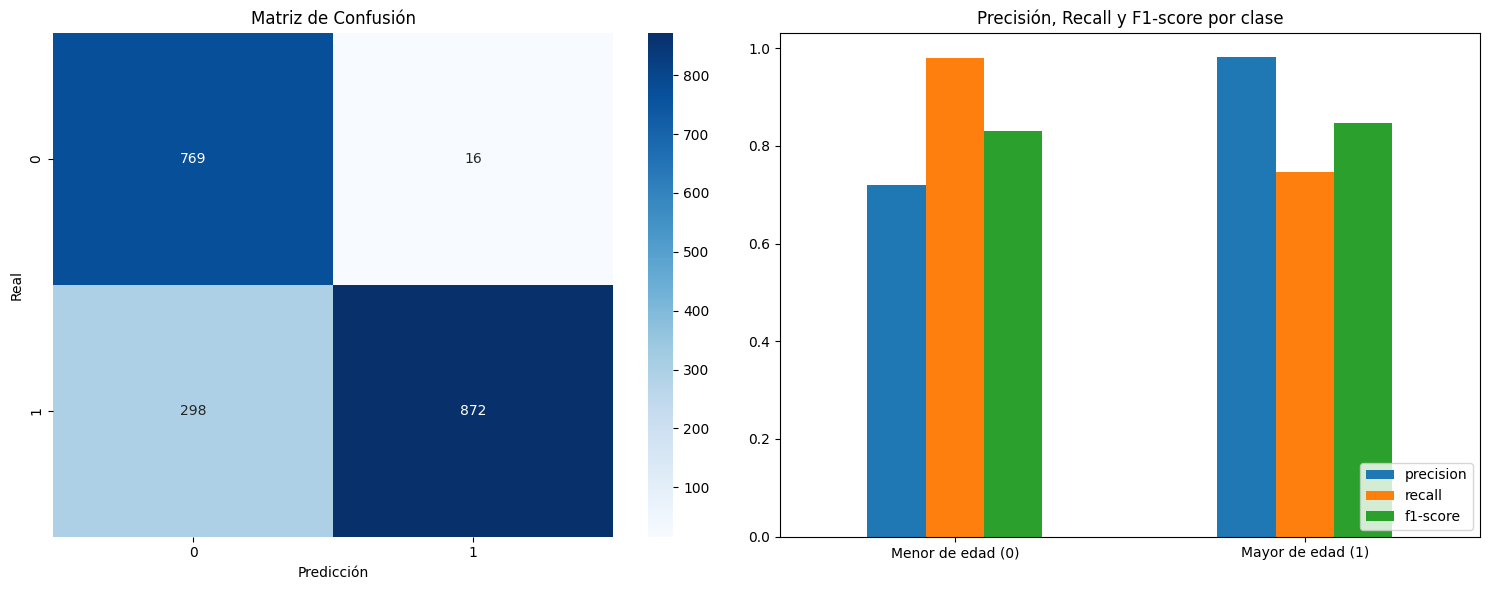

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import pandas as pd

# Configuración
IMG_SIZE = 64
BATCH_SIZE = 32
DATA_DIR = "/kaggle/working/face_age_cleaned_binary"

# Generador de datos sin mezcla, para evaluación
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Importante para que coincidan los índices con las predicciones
)

# Cargar modelo entrenado
model = tf.keras.models.load_model("modelo.keras")

# Predicciones
predictions = model.predict(val_gen)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Clasificación detallada
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Graficar
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax=axs[0])
axs[0].set_title("Matriz de Confusión")
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Real")

# Gráfico de métricas por clase
df_report.loc[['0', '1'], ['precision', 'recall', 'f1-score']].plot(kind='bar', ax=axs[1])
axs[1].set_title("Precisión, Recall y F1-score por clase")
axs[1].set_xticklabels(['Menor de edad (0)', 'Mayor de edad (1)'], rotation=0)
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()